# Imports

In [1]:
from run_single import run_single, graph_types
from slurm_main import slurm_main
from visualization import time_histograms, recover_data, fits, plot_one_fit

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Variables

# Time histograms

In [2]:
prefix = ''
results_dir = 'results/histograms/'

#type = 'line'

job_array_nb = 2

N = 100
M = 50
s = 0.001

nb_trajectories = 1000000 #1M runs

migration_rate = 0.001
nb_demes = 3

alpha = 1
initial_node = 1




In [3]:
run = False
if run:
    for type in graph_types:
        run_single(prefix, results_dir, type, job_array_nb, N,M,s, nb_trajectories, migration_rate, nb_demes, alpha, initial_node)

In [4]:
run=False

if run:
    for type in graph_types:
        time_histograms(results_dir, prefix, type, job_array_nb)

In [5]:
N_wm = N * nb_demes
M_wm = M * nb_demes



In [6]:
run = False

if run:
    run_single(prefix, results_dir, 'wm_sim', job_array_nb, N_wm,M_wm,s, nb_trajectories, migration_rate)

In [7]:
run=False
if run:
    time_histograms(results_dir, prefix, 'wm_sim', job_array_nb)

# Comparing structures

# Comparing migration rates

# Estimating the effective population size as a function of M

Fitting $\gamma$ with the model:
$$
\phi (s) = \frac{1 - \exp (-\gamma s)}{1 - \exp (-\gamma N D s)}
$$

In [8]:
results_dir = 'results/fit_10k/'
num = 30
nb_M_values = 10
nb_migration_rate_values = 4
gammas = np.zeros((nb_M_values, nb_migration_rate_values))




type = 'clique'
N = 50
M_range = [1] + [i*N//(nb_M_values-1) for i in range(1,nb_M_values)]
log_s_min = -2
log_s_max = -1
#nb_trajectories = 1000  #1k_runs
nb_trajectories = 10000  #10k_runs
#nb_trajectories = 100000  #100k_runs
nb_demes = 5
migration_rate_range = np.logspace(start=1, stop=4, base= 1/nb_demes, num= nb_migration_rate_values)



In [9]:
run=False

if run:
    for i,M in enumerate(M_range):
        prefix = f'M={M}'
        for j, migration_rate in enumerate(migration_rate_range):
            job_array_nb = j
            slurm_main(prefix, results_dir, num, type, job_array_nb, N, M, log_s_min, log_s_max, nb_trajectories, migration_rate, nb_demes)

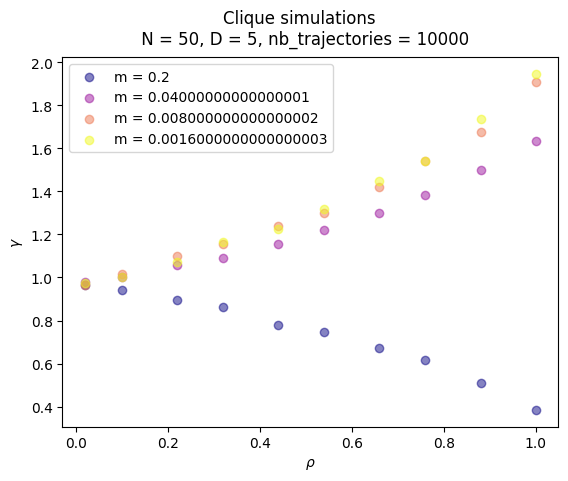

In [10]:
run=True

gammas = fits(results_dir, M_range, migration_rate_range,type)


c:\Users\Noé\Documents\EPFL\Lab Immersion\partial_sampling_spatially_structured_population\visualization.py:461: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


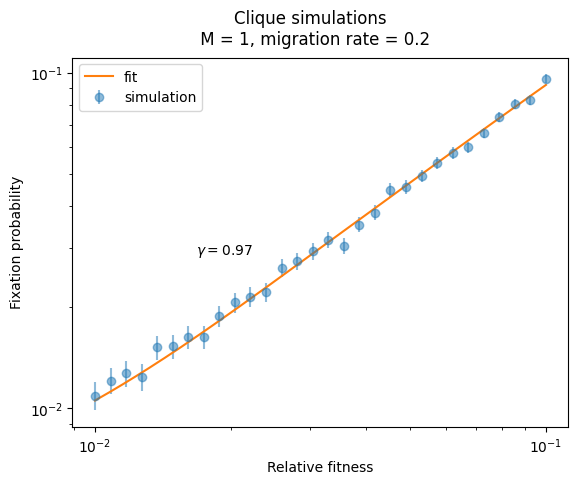

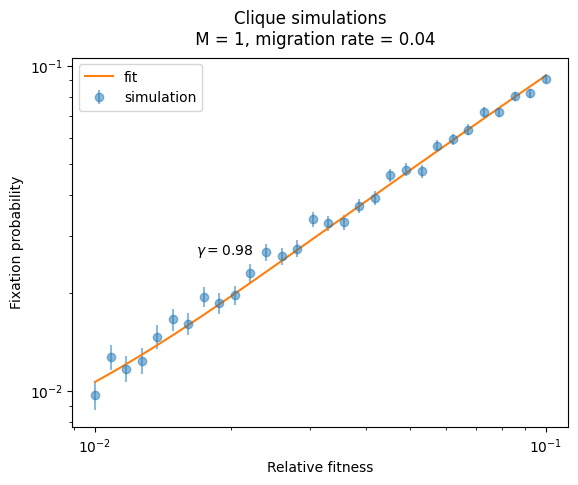

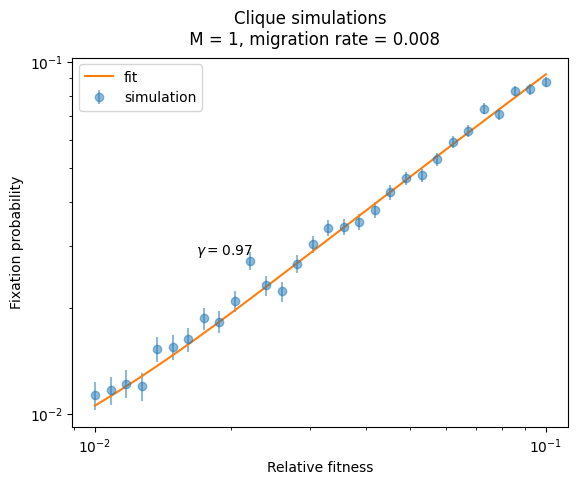

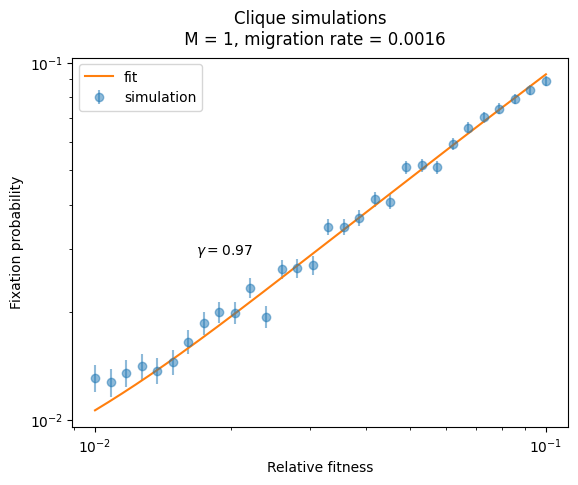

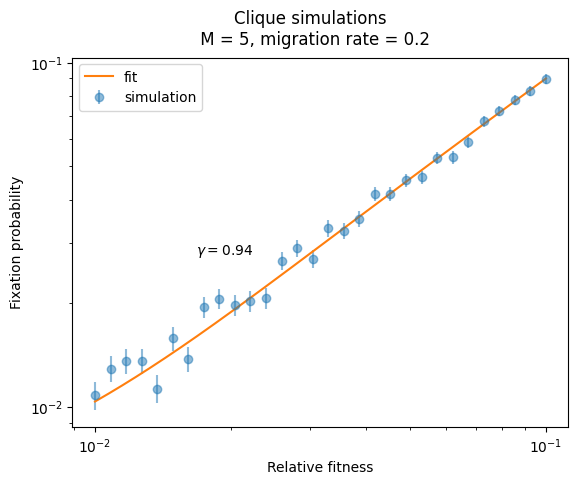

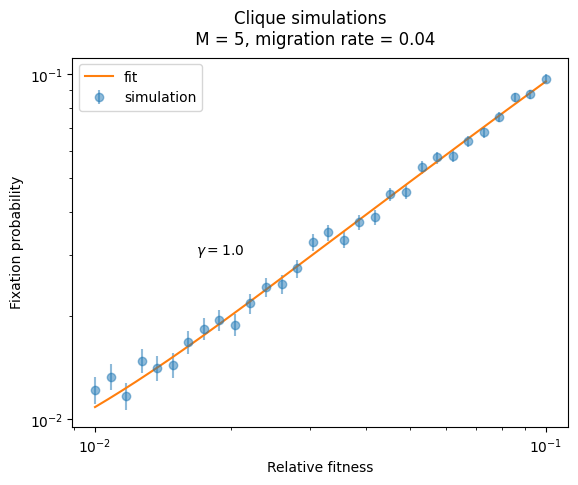

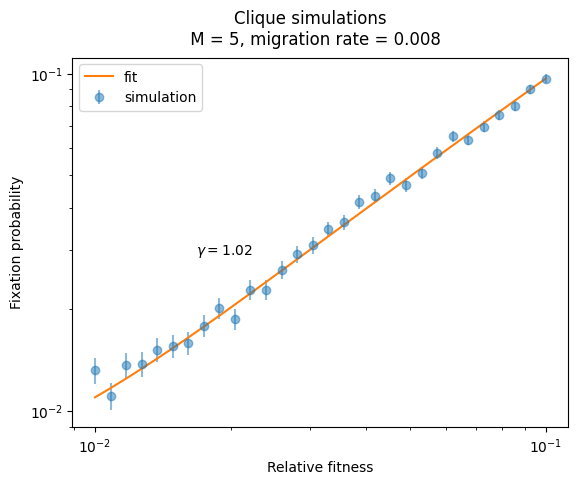

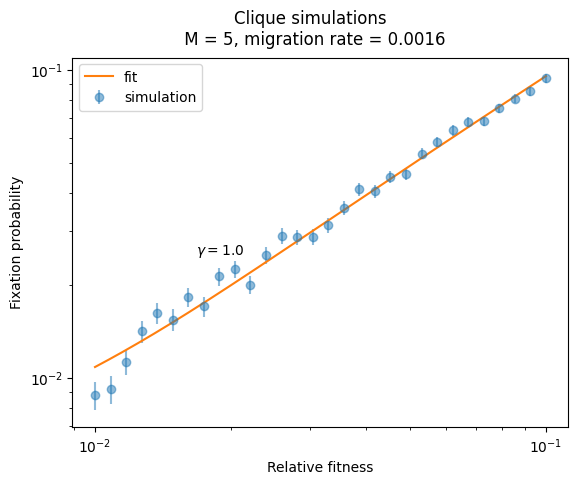

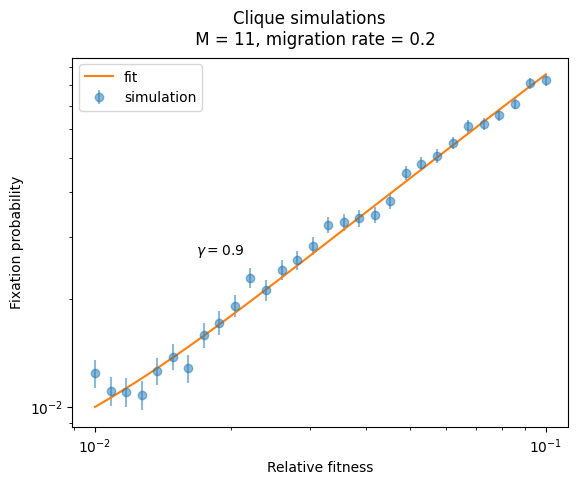

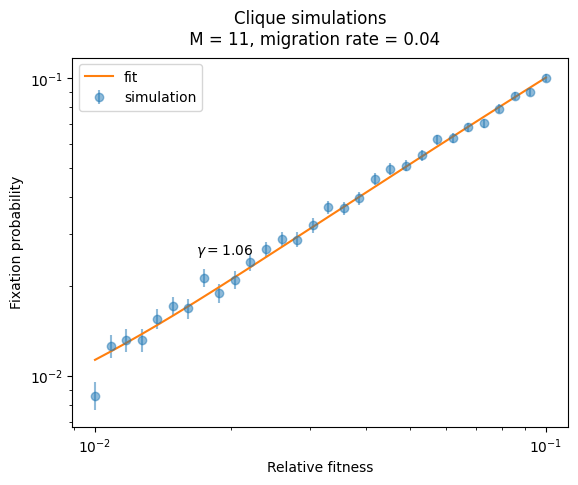

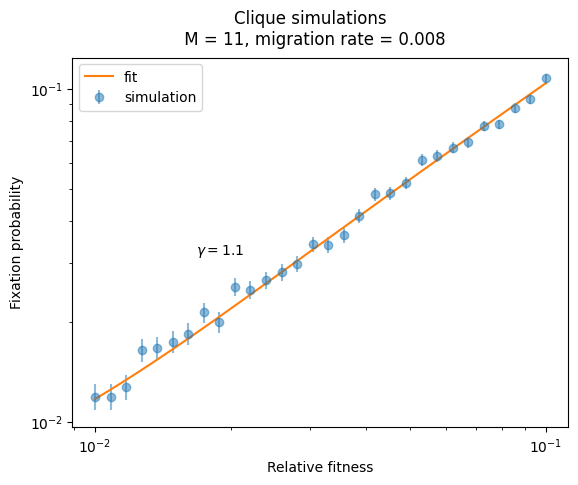

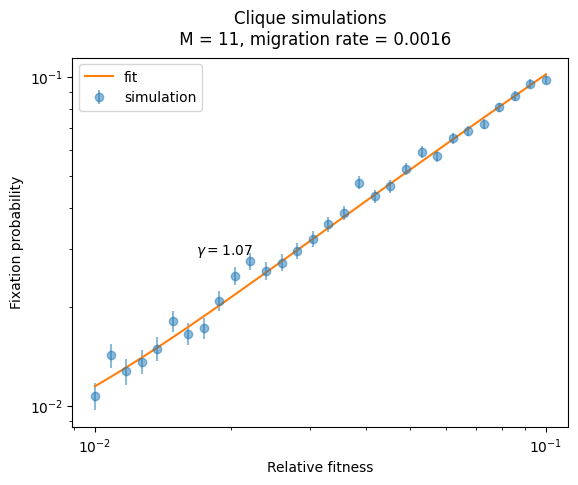

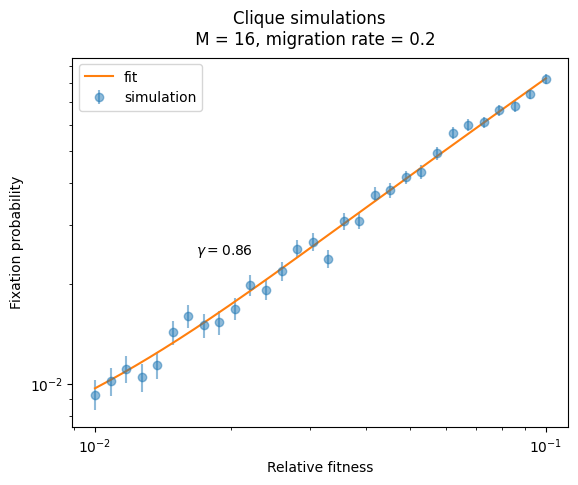

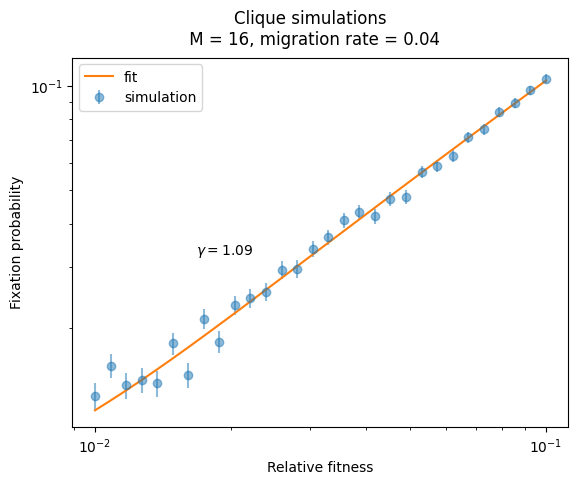

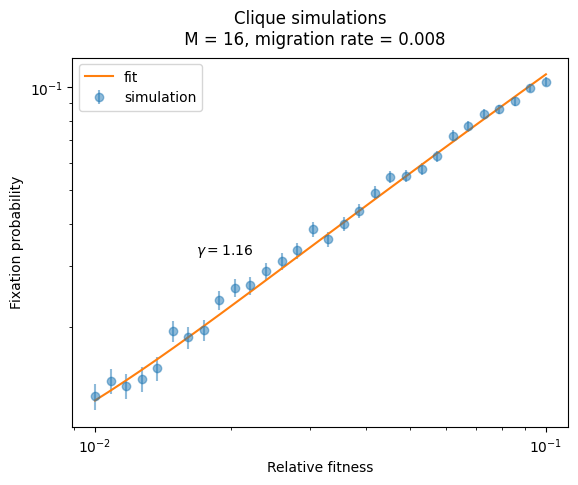

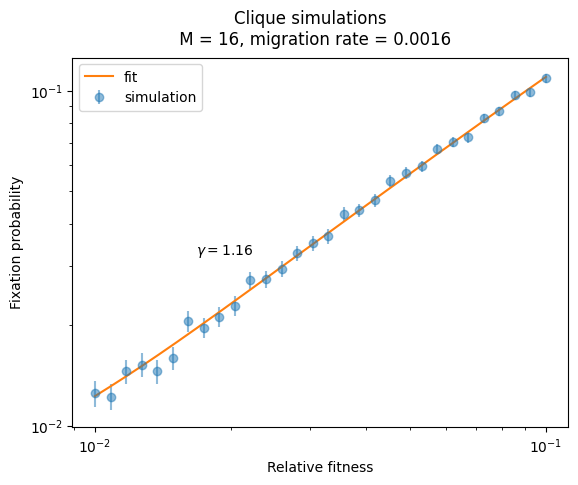

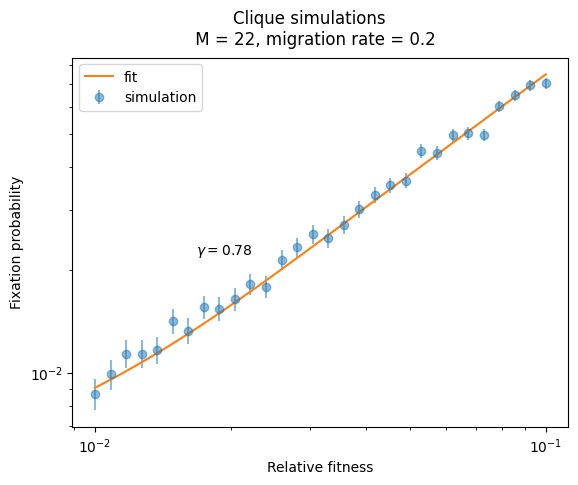

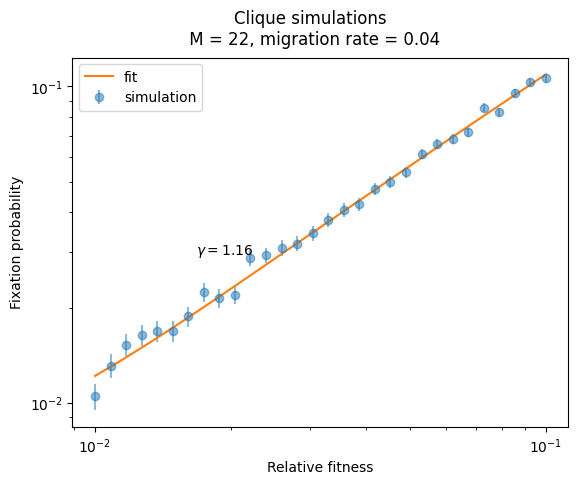

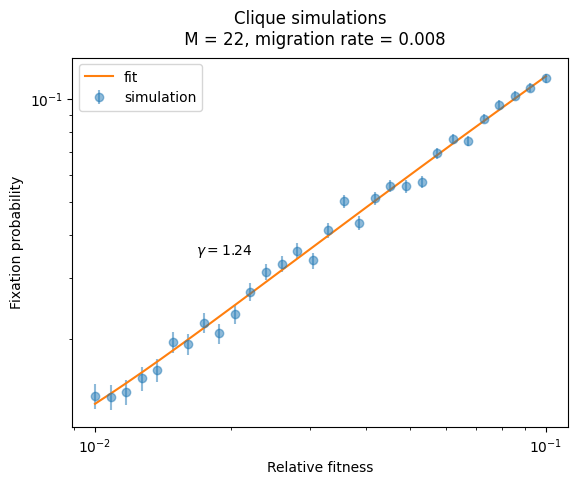

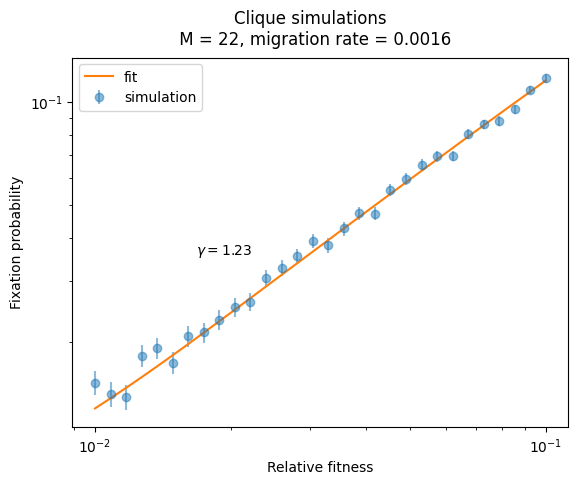

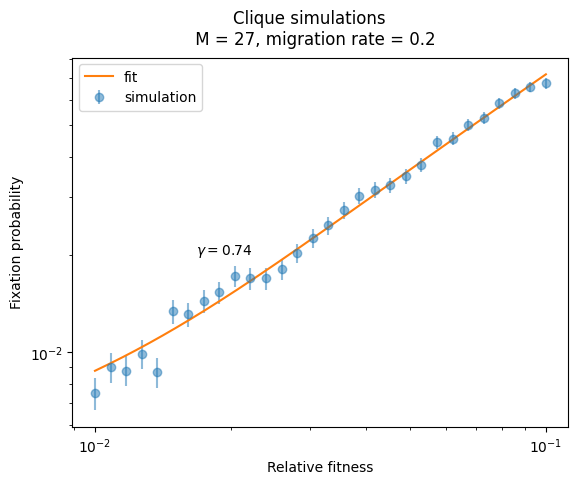

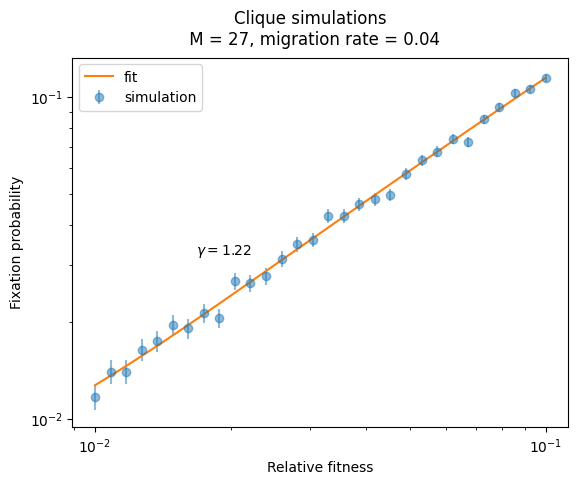

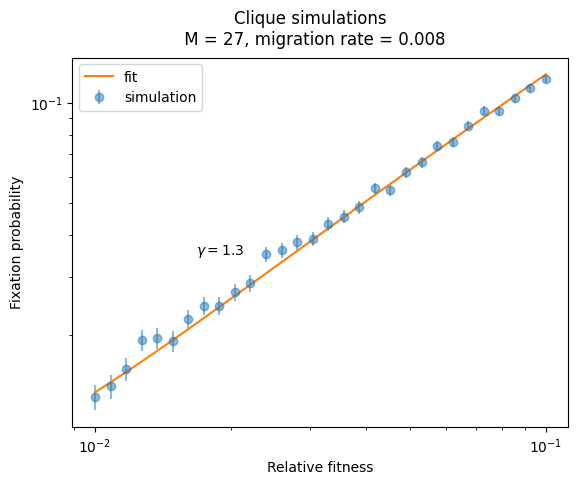

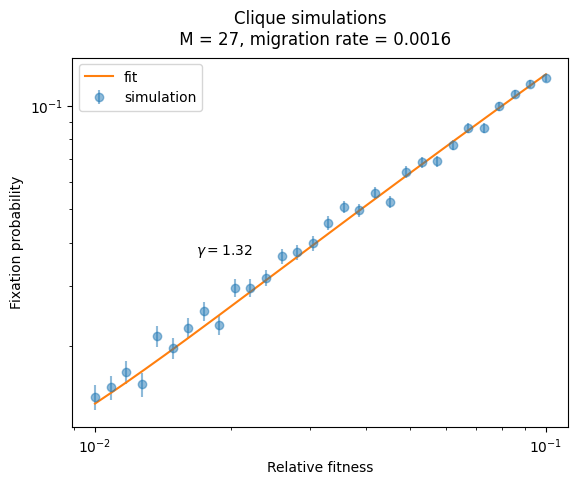

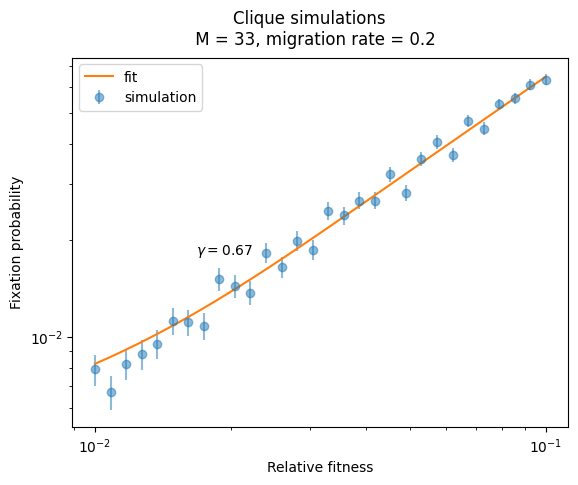

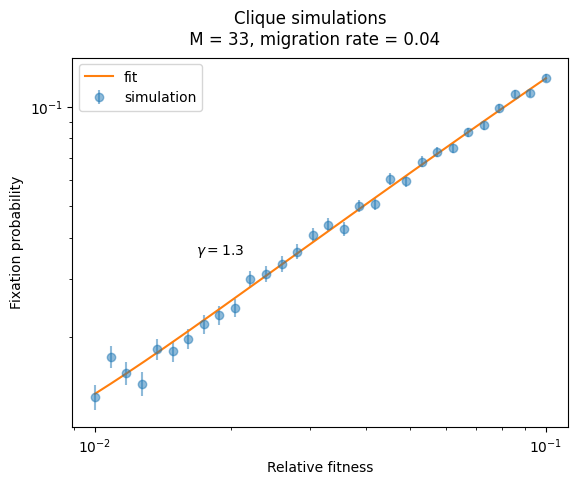

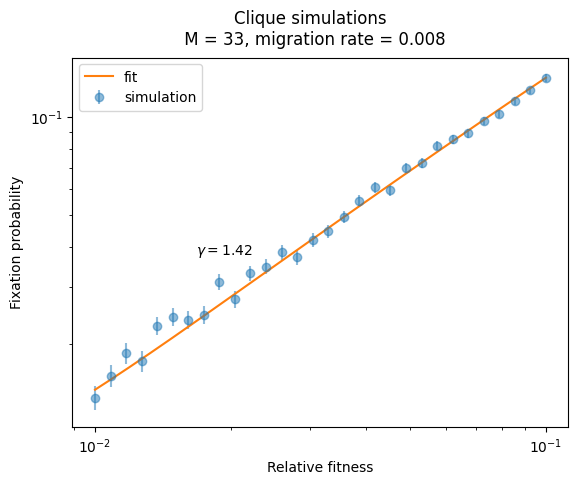

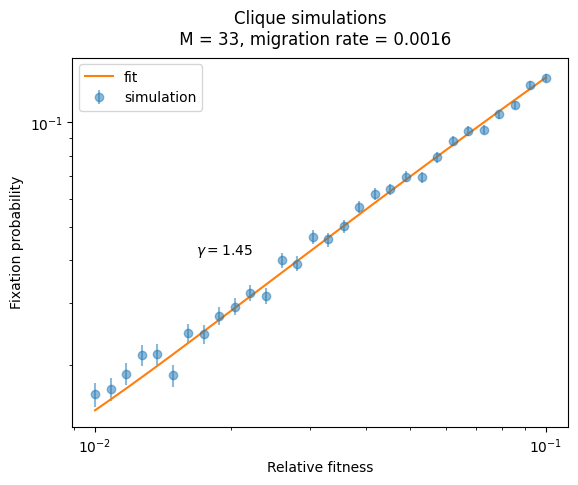

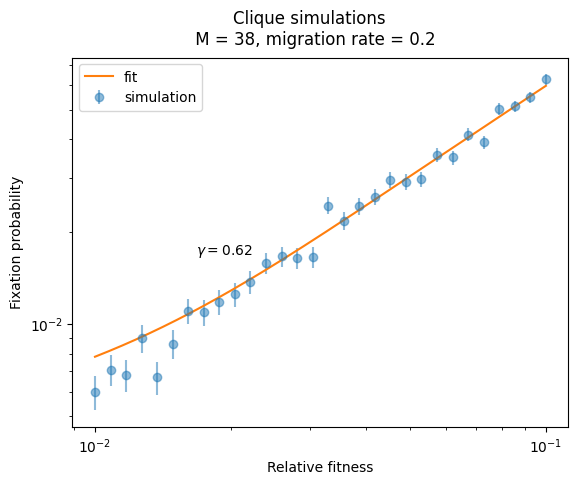

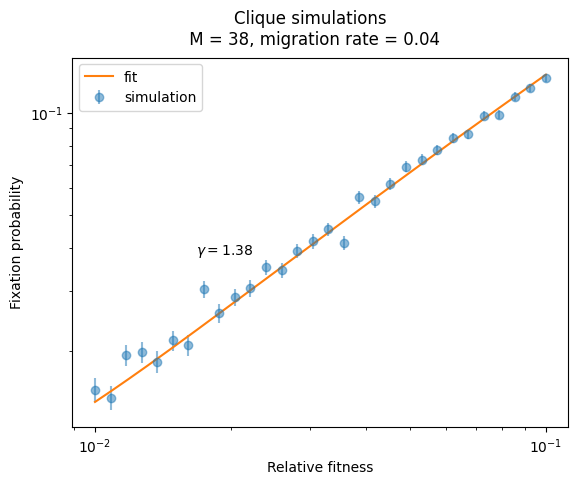

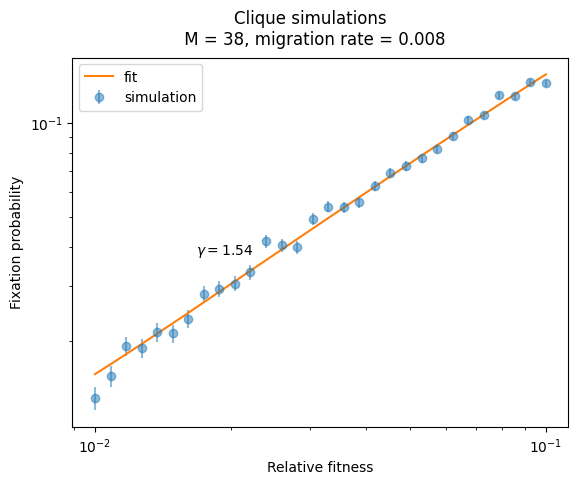

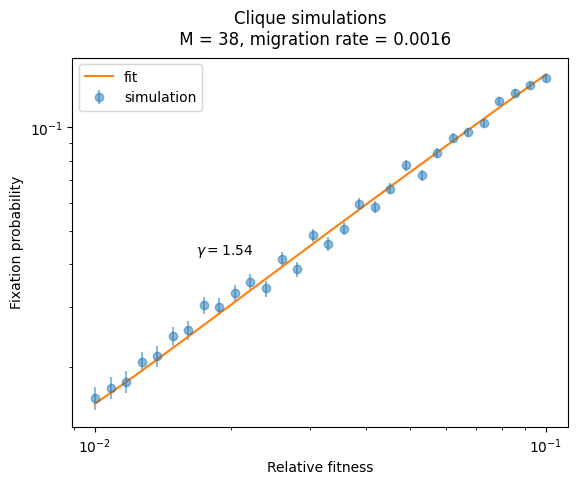

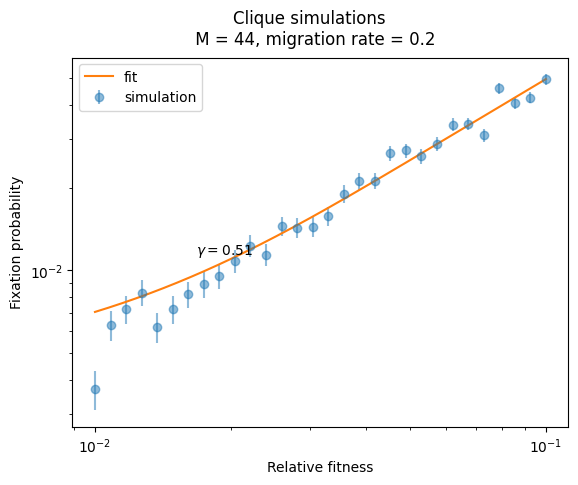

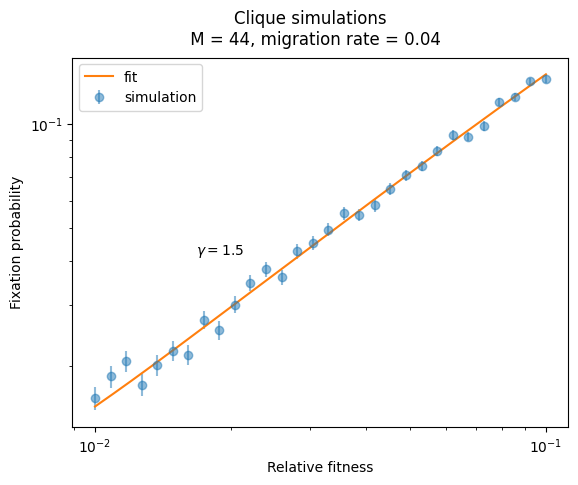

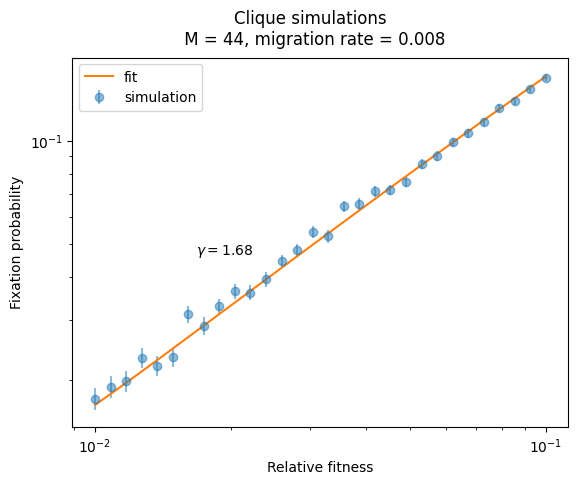

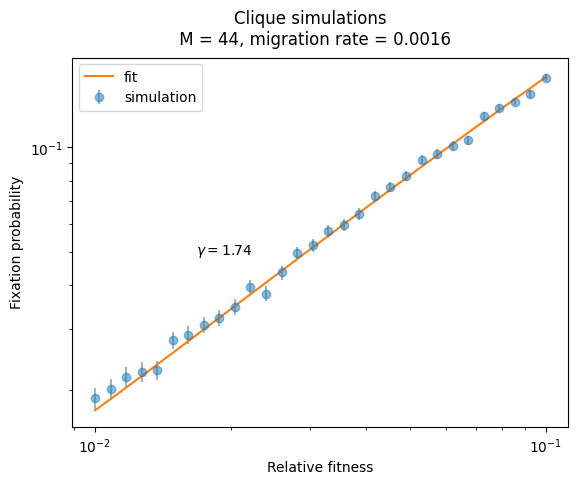

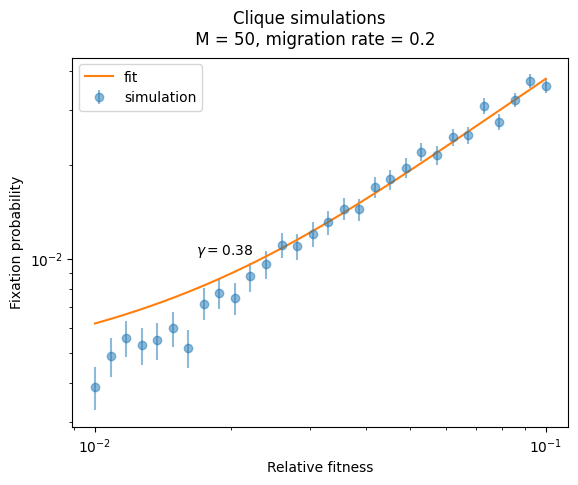

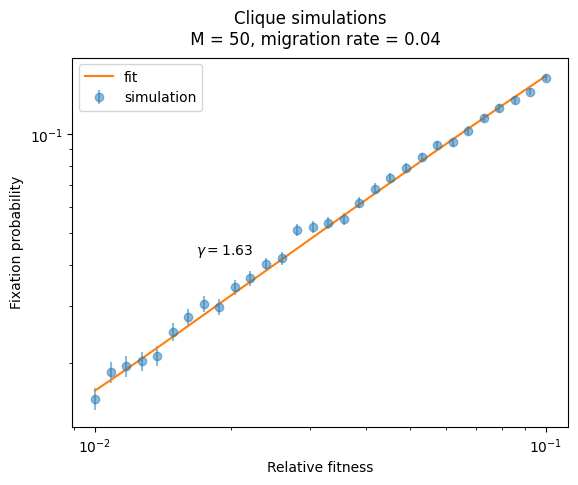

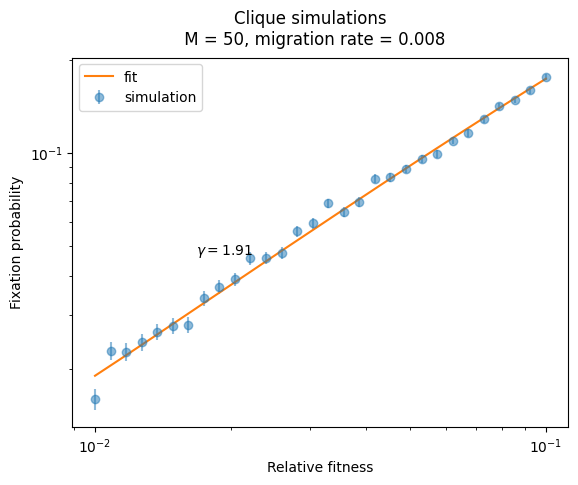

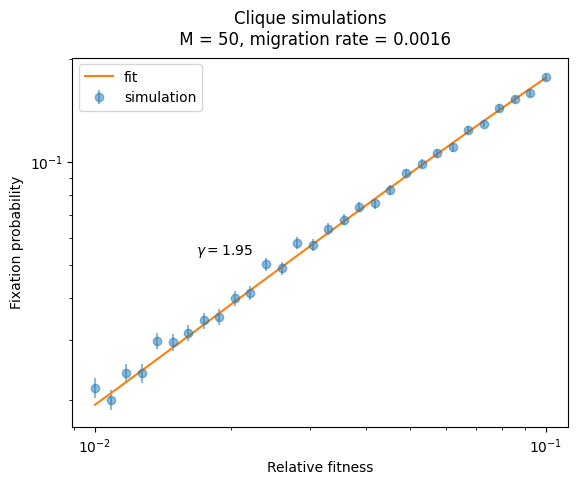

In [11]:
run=True
if run:
    for M_index,_ in enumerate(M_range):
        for job_array_nb,_ in enumerate(migration_rate_range):
            plot_one_fit(M_index,M_range, migration_rate_range, type, results_dir,job_array_nb, gammas)
